In [1]:
import sys
import os

# 1. Lấy đường dẫn tuyệt đối của thư mục hiện tại (notebooks)
current_dir = os.getcwd()

# 2. Lấy đường dẫn của thư mục cha (MODELS)
project_root = os.path.dirname(current_dir)

# 3. Thêm thư mục cha vào hệ thống tìm kiếm module của Python
if project_root not in sys.path:
    sys.path.append(project_root)

# Kiểm tra xem đã thêm đúng chưa (Optional)
print(f"Project Root added: {project_root}")

Project Root added: d:\Coding\School\Y3-K1\Intro2ML\Lab 2 - Softmax  Regression\src\Intro2ML-Lab02-SoftmaxRegression\MODELS


In [2]:
from models.utils.loader import *
from models.utils.visualize import *
from models.metrics import *
from models.softmax_regression import *
from models.model_pixel import PixelSoftmax
from models.model_edge import EdgeSoftmax
from models.model_pca import PCASoftmax
from models.model_block import BlockSoftmax
from models.model_hog import HOGSoftmax

Extracting HOG features...
HOG Feature shape: (60000, 144)
Accuracy: 0.6922


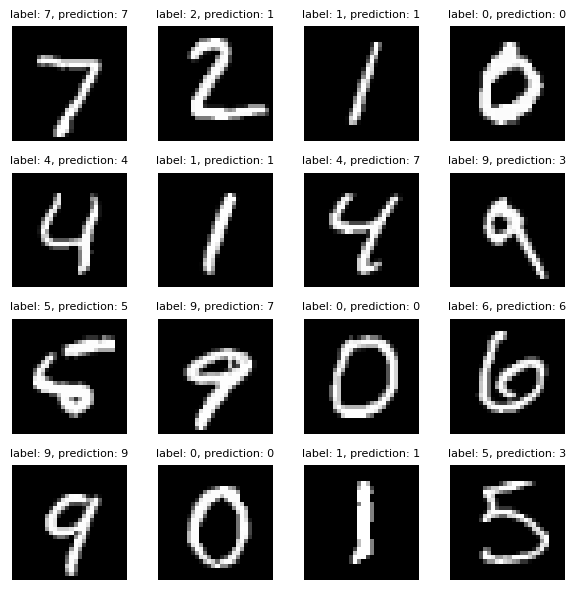

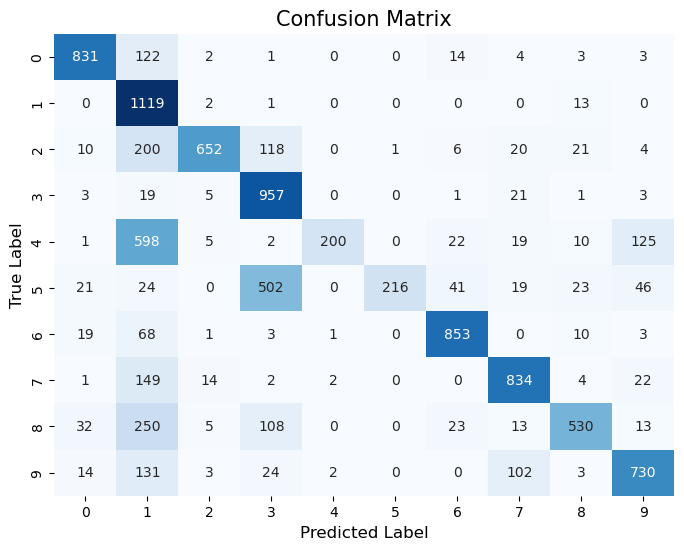

In [3]:
datapath = os.path.join(project_root, 'data/mnist_data.npz')
X_train, y_train, X_test, y_test = load_dataset(datapath)

model = HOGSoftmax(10)

model.fit(X_train.reshape(X_train.shape[0], -1), y_train, learning_rate=0.1, epochs=100, verbose=False)

y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

print(f"Accuracy: {accuracy(y_pred, y_test)}")

plt.figure(figsize=(6,6))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'label: {y_test[i]}, prediction: {y_pred[i]}', fontsize=8)

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred, num_classes=10)

plot_confusion_matrix(cm, range(10))

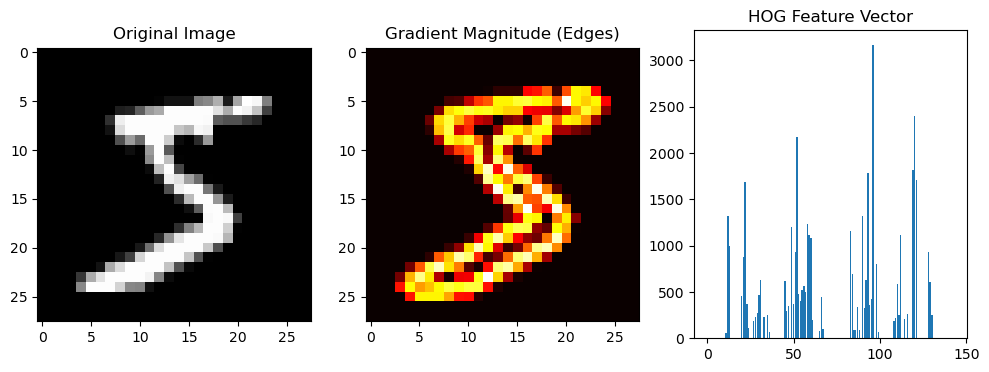

In [5]:

visualize_hog_features(model=model, X_sample=X_train[0])